# 07_Asset_Utilisation_Analysis.ipynb

## Title: "Asset Utilisation Analysis"

### Contents:

- Exploring Turnover Ratio data from SEC.
- Comparison with ---.sql. #TODO
- Asset Turnover Ratio analysis.
- Visual representations and implications.

---

# Set Up the Environment

## Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go 

## Functions

In [3]:
def prepare_and_sort_financial_data(df, metric):
    """
    Prepares and sorts financial data for a specific metric.

    Args:
    df (DataFrame): The raw DataFrame containing financial data.
    metric (str): The specific financial metric to prepare and sort (e.g., 'OperatingIncomeLoss').

    Returns:
    DataFrame: A DataFrame filtered, cleaned, and sorted for the specific metric.
    """
    # Filter by Metric
    df_metric = df[df['Metric'] == metric]

    # Filter for 10-K filings and ensure 'frame' column is not empty
    filtered_df = df_metric[df_metric['form'] == '10-K']
    filtered_df = filtered_df[filtered_df['frame'].notna()]

    # Drop unnecessary columns
    columns_to_drop = ['accn', 'fy', 'fp', 'form', 'filed']
    filtered_df_cleaned = filtered_df.drop(columns=columns_to_drop)

    # Define a custom sorting key and split into 'year' and 'quarter'
    def custom_sort_key(frame_value):
        year = frame_value[2:6]  # Extract the year part (e.g., '2007')
        quarter_order = {'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4, 'FY': 5}  # Define order for quarters and FY
        quarter = frame_value[6:] if frame_value[6:] in quarter_order else 'FY'
        return (year, quarter_order[quarter])

    filtered_df_cleaned[['year', 'quarter']] = filtered_df_cleaned['frame'].apply(custom_sort_key).apply(pd.Series)

    # Sort the DataFrame and drop the 'frame' and 'frame_sort_key' columns
    sorted_df = filtered_df_cleaned.sort_values(by=['year', 'quarter']).drop(columns=['frame'])

    return sorted_df

# Example usage with multiple metrics
# operating_income_loss_data = prepare_and_sort_financial_data(raw_data, 'OperatingIncomeLoss')
# net_income_loss_data = prepare_and_sort_financial_data(raw_data, 'NetIncomeLoss')
# revenues_data = prepare_and_sort_financial_data(raw_data, 'Revenues')


# Load Data

## Load Data from CSV File

In [4]:
raw_data = pd.read_csv('combined_df.csv')

In [5]:
# Inspect the first few rows of the dataset
raw_data.head(2)

,EntityName,CIK,Metric,start,end,val,accn,fy,fp,form,filed,frame
0,THE BOEING COMPANY,12927,Revenues,2007-01-01,2007-12-31,66387000000,0001193125-10-024406,2009,FY,10-K,2010-02-08,CY2007
1,THE BOEING COMPANY,12927,Revenues,2008-01-01,2008-06-30,32952000000,0001193125-09-152905,2009,Q2,10-Q,2009-07-22,NaN


In [6]:
# Convert 'end' column to datetime for proper sorting
raw_data['end'] = pd.to_datetime(raw_data['end'], format='%Y-%m-%d')


In [7]:
# Check the data types and look for any missing values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   EntityName  394 non-null    object        
 1   CIK         394 non-null    int64         
 2   Metric      394 non-null    object        
 3   start       278 non-null    object        
 4   end         394 non-null    datetime64[ns]
 5   val         394 non-null    int64         
 6   accn        394 non-null    object        
 7   fy          394 non-null    int64         
 8   fp          394 non-null    object        
 9   form        394 non-null    object        
 10  filed       394 non-null    object        
 11  frame       134 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 37.1+ KB


# Individual Metrics Analysis

## Analysis of Revenues

In [8]:
revenues = raw_data[raw_data['Metric'] == 'Revenues']

In [9]:
revenues_data = prepare_and_sort_financial_data(raw_data, 'Revenues')

In [10]:
revenues_data.head(2)

,EntityName,CIK,Metric,start,end,val,year,quarter
0,THE BOEING COMPANY,12927,Revenues,2007-01-01,2007-12-31,66387000000,2007,5
6,THE BOEING COMPANY,12927,Revenues,2008-01-01,2008-12-31,60909000000,2008,5


           CIK                            end           val    quarter
count     61.0                             61  6.100000e+01  61.000000
mean   12927.0  2014-12-15 13:46:13.770491904  3.564162e+10   3.180328
min    12927.0            2007-12-31 00:00:00  1.491000e+10   1.000000
25%    12927.0            2011-12-31 00:00:00  1.938300e+10   2.000000
50%    12927.0            2014-12-31 00:00:00  2.328600e+10   3.000000
75%    12927.0            2017-12-31 00:00:00  5.815800e+10   5.000000
max    12927.0            2022-12-31 00:00:00  1.011270e+11   5.000000
std        0.0                            NaN  2.622392e+10   1.466381


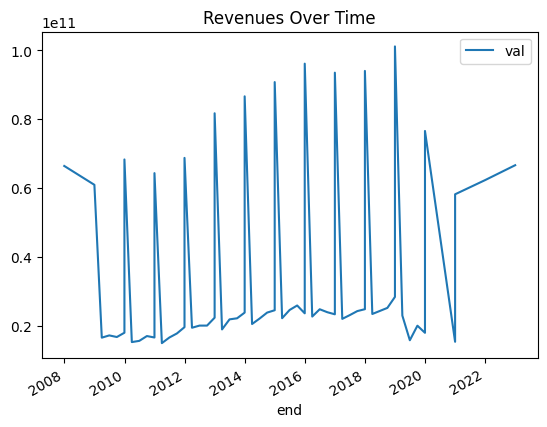

In [11]:
print(revenues_data.describe())
revenues_data.plot(x='end', y='val', title='Revenues Over Time')
plt.show()


## Analysis of PropertyPlantAndEquipmentNet 

In [12]:
equipment_net = raw_data[raw_data['Metric'] == 'PropertyPlantAndEquipmentNet']

In [13]:
equipment_net_data = prepare_and_sort_financial_data(raw_data, 'PropertyPlantAndEquipmentNet')

In [14]:
equipment_net_data.head(2)

,EntityName,CIK,Metric,start,end,val,year,quarter
280,THE BOEING COMPANY,12927,PropertyPlantAndEquipmentNet,NaN,2008-12-31,8762000000,2008,5
287,THE BOEING COMPANY,12927,PropertyPlantAndEquipmentNet,NaN,2009-12-31,8784000000,2009,5


<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 280 to 383
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   EntityName  14 non-null     object        
 1   CIK         14 non-null     int64         
 2   Metric      14 non-null     object        
 3   start       0 non-null      object        
 4   end         14 non-null     datetime64[ns]
 5   val         14 non-null     int64         
 6   year        14 non-null     object        
 7   quarter     14 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 1008.0+ bytes
None


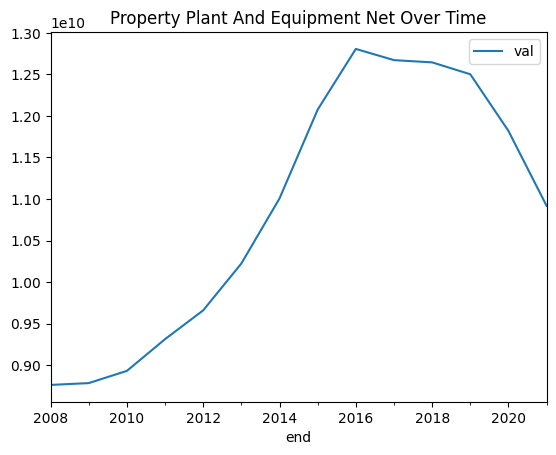

In [16]:
print(equipment_net_data.info())
equipment_net_data.plot(x='end', y='val', title='Property Plant And Equipment Net Over Time')
plt.show()


# Merge the Data

In [17]:
df_merged = pd.merge(equipment_net_data, revenues_data, 
                     on=['EntityName', 'CIK', 'end', 'year', 'quarter'], 
                     how='outer', suffixes=('_equipment', '_revenues'))

In [19]:
df_merged.rename(columns={'val_equipment': 'EquipmentNet', 
                          'val_revenues': 'Revenues'}, inplace=True)

In [23]:
# Filtering out the annual data (rows where quarter is '5')
#df_merged_quarterly = df_merged[df_merged['quarter']] #!= 5]

In [21]:
df_merged.head()

,EntityName,CIK,Metric_equipment,start_equipment,end,EquipmentNet,year,quarter,Metric_revenues,start_revenues,Revenues
0,THE BOEING COMPANY,12927,PropertyPlantAndEquipmentNet,NaN,2008-12-31,8.762000e+09,2008,5,Revenues,2008-01-01,60909000000
1,THE BOEING COMPANY,12927,PropertyPlantAndEquipmentNet,NaN,2009-12-31,8.784000e+09,2009,5,Revenues,2009-01-01,68281000000
2,THE BOEING COMPANY,12927,PropertyPlantAndEquipmentNet,NaN,2010-12-31,8.931000e+09,2010,5,Revenues,2010-01-01,64306000000
3,THE BOEING COMPANY,12927,PropertyPlantAndEquipmentNet,NaN,2011-12-31,9.313000e+09,2011,5,Revenues,2011-01-01,68735000000
4,THE BOEING COMPANY,12927,PropertyPlantAndEquipmentNet,NaN,2012-12-31,9.660000e+09,2012,5,Revenues,2012-01-01,81698000000


# Calculation

**Asset Utilization:**
    
    - `PropertyPlantAndEquipmentNet`(EquipmentNet)
    - `Revenues`
    - **Calculation:** Asset Turnover Ratio = Revenues / Property, Plant, and Equipment Net

In [22]:
# Start by creating a copy of the DataFrame to avoid SettingWithCopyWarning
df_final = df_merged.copy()

In [23]:
# Convert financial values from cents to millions for readability
df_final['EquipmentNet'] /= 1000000
df_final['Revenues'] /= 1000000

In [24]:
# Calculate Asset Turnover Ratio
# Handle division by zero by replacing zero denominators with NaN
df_final['AssetTurnoverRatio'] = df_final.apply(
    lambda row: row['Revenues'] / row['EquipmentNet'] if row['EquipmentNet'] != 0 else None, axis=1
)

In [25]:
# Construct the 'Quarter' column
df_final['Quarter'] = df_final['year'].astype(str) + '-Q' + df_final['quarter'].astype(str)
# Construct the 'Quarter' column for annual data
#df_final['Quarter'] = 'FY-' + df_final['year'].astype(str)

In [26]:
# Selecting and renaming columns to match the desired format
df_final = df_final[['EntityName', 'CIK', 'end', 'AssetTurnoverRatio', 'EquipmentNet', 'Revenues', 'Quarter']]


In [27]:
df_copy = df_final.copy()
df_copy.rename(columns={'EntityName': 'ENTITY', 'end': 'DATE'}, inplace=True)

In [28]:
df_copy.head(2)

,ENTITY,CIK,DATE,AssetTurnoverRatio,EquipmentNet,Revenues,Quarter
0,THE BOEING COMPANY,12927,2008-12-31,6.951495,8762.0,60909.0,2008-Q5
1,THE BOEING COMPANY,12927,2009-12-31,7.773338,8784.0,68281.0,2009-Q5


# Visualization

In [30]:
import plotly.express as px

# Plotting Asset Turnover Ratio over time
fig = px.line(df_copy
              , x='DATE', y='AssetTurnoverRatio', 
              title='Interactive Asset Turnover Ratio Over Time',
              labels={'AssetTurnoverRatio': 'Asset Turnover Ratio'})

# Interactive features
fig.update_traces(mode='lines+markers')
fig.update_layout(hovermode='x unified')
fig.show()